In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../TF/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


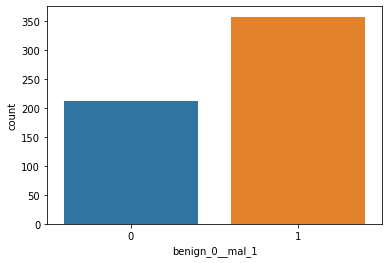

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

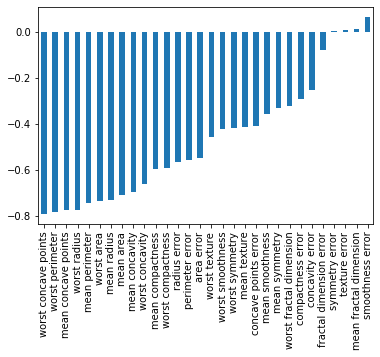

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [18]:
model.fit(X_train,y_train,epochs = 600,validation_data=(X_test,y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 [==============================] - 1s 2ms/sample - loss: 0.6817 - val_loss: 0.6533
Epoch 2/600
455/455 [==============================] - 0s 94us/sample - loss: 0.6373 - val_loss: 0.6034
Epoch 3/600
455/455 [==============================] - 0s 95us/sample - loss: 0.5856 - val_loss: 0.5447
Epoch 4/600
455/455 [==============================] - 0s 83us/sample - loss: 0.5303 - val_loss: 0.4862
Epoch 5/600
455/455 [==============================] - 0s 81us/sample - loss: 0.4739 - val_loss: 0.4268
Epoch 6/600
455/455 [==============================] - 0s 77us/sample - loss: 0.4224 - val_loss: 0.3781
Epoch 7/600
455/455 [==============================] - 0s 85us/sample - loss: 0.3741 - val_loss: 0.3317
Epoch 8/600
455/455 [==============================] - 0s 88us/sample - loss: 0.3378 - val_loss: 0.2972
Epoch 9/600
455/455 [==============================] - 0s 81us/sample - loss: 0.3072 - val_loss: 0.2670
Epoch 10/600
455/45

455/455 [==============================] - 0s 88us/sample - loss: 0.0535 - val_loss: 0.0558
Epoch 79/600
455/455 [==============================] - 0s 90us/sample - loss: 0.0536 - val_loss: 0.0563
Epoch 80/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0551 - val_loss: 0.0592
Epoch 81/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0519 - val_loss: 0.0554
Epoch 82/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0507 - val_loss: 0.0576
Epoch 83/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0535 - val_loss: 0.0544
Epoch 84/600
455/455 [==============================] - 0s 77us/sample - loss: 0.0527 - val_loss: 0.0558
Epoch 85/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0526 - val_loss: 0.0556
Epoch 86/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0520 - val_loss: 0.0542
Epoch 87/600
455/455 [==============================] - 0s 85us/samp

455/455 [==============================] - 0s 90us/sample - loss: 0.0399 - val_loss: 0.0551
Epoch 156/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0373 - val_loss: 0.0579
Epoch 157/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0363 - val_loss: 0.0547
Epoch 158/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0373 - val_loss: 0.0574
Epoch 159/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0382 - val_loss: 0.0567
Epoch 160/600
455/455 [==============================] - 0s 90us/sample - loss: 0.0356 - val_loss: 0.0601
Epoch 161/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0364 - val_loss: 0.0561
Epoch 162/600
455/455 [==============================] - 0s 86us/sample - loss: 0.0372 - val_loss: 0.0587
Epoch 163/600
455/455 [==============================] - 0s 75us/sample - loss: 0.0360 - val_loss: 0.0575
Epoch 164/600
455/455 [==============================] - 0s 

455/455 [==============================] - 0s 90us/sample - loss: 0.0274 - val_loss: 0.0680
Epoch 233/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0284 - val_loss: 0.0660
Epoch 234/600
455/455 [==============================] - 0s 90us/sample - loss: 0.0274 - val_loss: 0.0678
Epoch 235/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0280 - val_loss: 0.0675
Epoch 236/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0282 - val_loss: 0.0616
Epoch 237/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0279 - val_loss: 0.0680
Epoch 238/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0274 - val_loss: 0.0638
Epoch 239/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0296 - val_loss: 0.0694
Epoch 240/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0266 - val_loss: 0.0657
Epoch 241/600
455/455 [==============================] - 0s 

455/455 [==============================] - 0s 78us/sample - loss: 0.0201 - val_loss: 0.0859
Epoch 310/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0195 - val_loss: 0.0723
Epoch 311/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0230 - val_loss: 0.0831
Epoch 312/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0244 - val_loss: 0.0849
Epoch 313/600
455/455 [==============================] - 0s 77us/sample - loss: 0.0224 - val_loss: 0.0828
Epoch 314/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0208 - val_loss: 0.0870
Epoch 315/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0198 - val_loss: 0.0793
Epoch 316/600
455/455 [==============================] - 0s 84us/sample - loss: 0.0193 - val_loss: 0.0796
Epoch 317/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0223 - val_loss: 0.0718
Epoch 318/600
455/455 [==============================] - 0s 

455/455 [==============================] - 0s 83us/sample - loss: 0.0159 - val_loss: 0.0949
Epoch 387/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0159 - val_loss: 0.0954
Epoch 388/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0162 - val_loss: 0.1050
Epoch 389/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0151 - val_loss: 0.0960
Epoch 390/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0173 - val_loss: 0.0840
Epoch 391/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0205 - val_loss: 0.1274
Epoch 392/600
455/455 [==============================] - 0s 81us/sample - loss: 0.0151 - val_loss: 0.0890
Epoch 393/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0169 - val_loss: 0.0938
Epoch 394/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0166 - val_loss: 0.1091
Epoch 395/600
455/455 [==============================] - 0s 

455/455 [==============================] - 0s 85us/sample - loss: 0.0119 - val_loss: 0.0947
Epoch 464/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0148 - val_loss: 0.1203
Epoch 465/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0127 - val_loss: 0.1063
Epoch 466/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0115 - val_loss: 0.1135
Epoch 467/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0119 - val_loss: 0.1045
Epoch 468/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0121 - val_loss: 0.1214
Epoch 469/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0119 - val_loss: 0.1045
Epoch 470/600
455/455 [==============================] - 0s 77us/sample - loss: 0.0151 - val_loss: 0.0976
Epoch 471/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0143 - val_loss: 0.1148
Epoch 472/600
455/455 [==============================] - 0s 

455/455 [==============================] - 0s 94us/sample - loss: 0.0118 - val_loss: 0.1005
Epoch 541/600
455/455 [==============================] - 0s 92us/sample - loss: 0.0130 - val_loss: 0.1326
Epoch 542/600
455/455 [==============================] - 0s 92us/sample - loss: 0.0099 - val_loss: 0.1078
Epoch 543/600
455/455 [==============================] - 0s 88us/sample - loss: 0.0081 - val_loss: 0.1643
Epoch 544/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0130 - val_loss: 0.1229
Epoch 545/600
455/455 [==============================] - 0s 83us/sample - loss: 0.0131 - val_loss: 0.1248
Epoch 546/600
455/455 [==============================] - 0s 85us/sample - loss: 0.0136 - val_loss: 0.1160
Epoch 547/600
455/455 [==============================] - 0s 79us/sample - loss: 0.0098 - val_loss: 0.1329
Epoch 548/600
455/455 [==============================] - 0s 76us/sample - loss: 0.0098 - val_loss: 0.1190
Epoch 549/600
455/455 [==============================] - 0s 

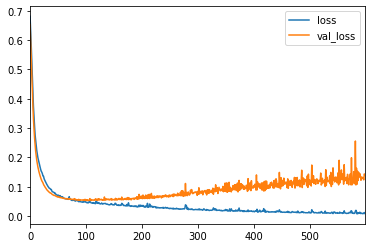

In [19]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [20]:
 model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_s = EarlyStopping(monitor = 'val_loss',mode='min',verbose = True,patience = 25)

In [23]:
model.fit(X_train,y_train,epochs = 600,validation_data = (X_test,y_test),
         callbacks = [early_s])

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 [==============================] - 0s 801us/sample - loss: 0.6962 - val_loss: 0.6724
Epoch 2/600
455/455 [==============================] - 0s 72us/sample - loss: 0.6634 - val_loss: 0.6352
Epoch 3/600
455/455 [==============================] - 0s 70us/sample - loss: 0.6259 - val_loss: 0.5910
Epoch 4/600
455/455 [==============================] - 0s 72us/sample - loss: 0.5825 - val_loss: 0.5372
Epoch 5/600
455/455 [==============================] - 0s 73us/sample - loss: 0.5327 - val_loss: 0.4781
Epoch 6/600
455/455 [==============================] - 0s 70us/sample - loss: 0.4773 - val_loss: 0.4197
Epoch 7/600
455/455 [==============================] - 0s 68us/sample - loss: 0.4213 - val_loss: 0.3569
Epoch 8/600
455/455 [==============================] - 0s 75us/sample - loss: 0.3653 - val_loss: 0.3059
Epoch 9/600
455/455 [==============================] - 0s 75us/sample - loss: 0.3254 - val_loss: 0.2658
Epoch 10/600
455/

455/455 [==============================] - 0s 68us/sample - loss: 0.0479 - val_loss: 0.0581
Epoch 79/600
455/455 [==============================] - 0s 64us/sample - loss: 0.0481 - val_loss: 0.0555
Epoch 80/600
455/455 [==============================] - 0s 61us/sample - loss: 0.0497 - val_loss: 0.0548
Epoch 81/600
455/455 [==============================] - 0s 64us/sample - loss: 0.0478 - val_loss: 0.0567
Epoch 82/600
455/455 [==============================] - 0s 59us/sample - loss: 0.0469 - val_loss: 0.0581
Epoch 83/600
455/455 [==============================] - 0s 68us/sample - loss: 0.0465 - val_loss: 0.0554
Epoch 84/600
455/455 [==============================] - 0s 61us/sample - loss: 0.0465 - val_loss: 0.0579
Epoch 85/600
455/455 [==============================] - 0s 64us/sample - loss: 0.0460 - val_loss: 0.0547
Epoch 86/600
455/455 [==============================] - 0s 61us/sample - loss: 0.0464 - val_loss: 0.0625
Epoch 87/600
455/455 [==============================] - 0s 56us/samp

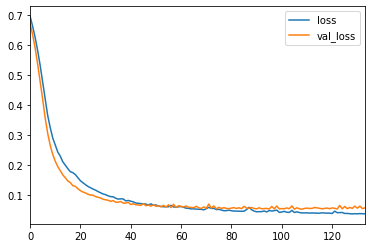

In [24]:
loss_ = pd.DataFrame(model.history.history)
loss_.plot()

In [26]:
# Dropouts
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5)) ## Half the neurons will be turned off

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5)) ## Half the neurons will be turned off
## The selection is random

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [29]:
model.fit(X_train,y_train,epochs = 600,validation_data = (X_test,y_test),
         callbacks = [early_s])

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 [==============================] - 0s 936us/sample - loss: 0.7167 - val_loss: 0.6922
Epoch 2/600
455/455 [==============================] - 0s 79us/sample - loss: 0.6679 - val_loss: 0.6693
Epoch 3/600
455/455 [==============================] - 0s 79us/sample - loss: 0.6584 - val_loss: 0.6470
Epoch 4/600
455/455 [==============================] - ETA: 0s - loss: 0.654 - 0s 81us/sample - loss: 0.6414 - val_loss: 0.6140
Epoch 5/600
455/455 [==============================] - 0s 78us/sample - loss: 0.6211 - val_loss: 0.5882
Epoch 6/600
455/455 [==============================] - 0s 76us/sample - loss: 0.6136 - val_loss: 0.5652
Epoch 7/600
455/455 [==============================] - 0s 81us/sample - loss: 0.5787 - val_loss: 0.5333
Epoch 8/600
455/455 [==============================] - 0s 77us/sample - loss: 0.5752 - val_loss: 0.5043
Epoch 9/600
455/455 [==============================] - 0s 78us/sample - loss: 0.5286 - val_loss: 

455/455 [==============================] - 0s 80us/sample - loss: 0.1259 - val_loss: 0.0711
Epoch 79/600
455/455 [==============================] - 0s 61us/sample - loss: 0.1608 - val_loss: 0.0789
Epoch 80/600
455/455 [==============================] - 0s 70us/sample - loss: 0.1173 - val_loss: 0.0713
Epoch 81/600
455/455 [==============================] - 0s 70us/sample - loss: 0.1186 - val_loss: 0.0689
Epoch 82/600
455/455 [==============================] - 0s 70us/sample - loss: 0.1528 - val_loss: 0.0679
Epoch 83/600
455/455 [==============================] - 0s 75us/sample - loss: 0.1510 - val_loss: 0.0646
Epoch 84/600
455/455 [==============================] - 0s 74us/sample - loss: 0.1356 - val_loss: 0.0645
Epoch 85/600
455/455 [==============================] - 0s 70us/sample - loss: 0.1108 - val_loss: 0.0655
Epoch 86/600
455/455 [==============================] - 0s 77us/sample - loss: 0.1253 - val_loss: 0.0652
Epoch 87/600
455/455 [==============================] - 0s 85us/samp

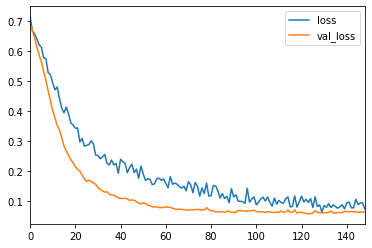

In [30]:
pd.DataFrame(model.history.history).plot()

In [34]:
preds = model.predict_classes(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [37]:
print(confusion_matrix(y_test,preds))

[[41  2]
 [ 1 70]]
